In [1]:
import torch

# Check if GPU is available
gpu_available = torch.cuda.is_available()
gpu_name = torch.cuda.get_device_name(0) if gpu_available else "No GPU found"

print("✅ GPU Available:", gpu_available)
print("🔹 GPU Name:", gpu_name)


✅ GPU Available: True
🔹 GPU Name: Tesla T4


In [2]:
!pip install ultralytics torch torchvision opencv-python matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 921.9/921.9 kB 12.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 44.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 22.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 24.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 74.6 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstall

In [3]:
import ultralytics

# Verify YOLOv8 installation
ultralytics.checks()

Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 35.5/112.6 GB disk)


In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
!cat /content/drive/MyDrive/ppe-detection-solution/dataset.yaml

train: /content/drive/MyDrive/ppe-detection-solution/split_dataset/images/train
val: /content/drive/MyDrive/ppe-detection-solution/split_dataset/images/val
test: /content/drive/MyDrive/ppe-detection-solution/split_dataset/images/test

nc: 9  # Number of classes (update if needed)
names: ["Helmet", "Vest", "Safety_Goggles", "Hearing_Protection", "Hairnet", "Gloves", "Coat", "Overshoes", "Worker"]




In [9]:
!yolo task=detect mode=train model=yolov8s.pt data=/content/drive/MyDrive/ppe-detection-solution/dataset.yaml epochs=100 imgsz=640

100% 21.5M/21.5M [00:00<00:00, 260MB/s]
Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=/content/drive/MyDrive/ppe-detection-solution/dataset.yaml, epochs=100, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_

In [10]:
!yolo task=detect mode=val model=/content/runs/detect/train/weights/best.pt data=/content/drive/MyDrive/ppe-detection-solution/dataset.yaml

Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,129,067 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/drive/MyDrive/ppe-detection-solution/split_dataset/labels/val.cache... 42 images, 1 backgrounds, 0 corrupt: 100% 42/42 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 3/3 [00:01<00:00,  1.80it/s]
                   all         42         99      0.738      0.583      0.656      0.241
                Helmet         11         12      0.706      0.801        0.8       0.31
                  Vest          3          4      0.511        0.5      0.504      0.164
        Safety_Goggles         13         14      0.791      0.643      0.713      0.327
    Hearing_Protection         18         26      0.842      0.617      0.718      0.162
               Hairnet         19         28      0.625      0.536      0.606      0.186
                  C

In [ ]:
from ultralytics import YOLO
import matplotlib.pyplot as plt

# Load trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Run validation
metrics = model.val()

# Plot confusion matrix
metrics.plot_confusion_matrix()
plt.show()


Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install ultralytics torch torchvision matplotlib

from ultralytics import YOLO

# Load the trained model
model = YOLO("/content/runs/detect/train/weights/best.pt")

print("✅ YOLO Model Reloaded Successfully!")


✅ YOLO Model Reloaded Successfully!


In [9]:
metrics = model.val()

Ultralytics 8.3.80 🚀 Python-3.11.11 torch-2.5.1+cu124 CUDA:0 (Tesla T4, 15095MiB)


val: Scanning /content/drive/MyDrive/ppe-detection-solution/split_dataset/labels/val.cache... 42 images, 1 backgrounds, 0 corrupt: 100%|██████████| 42/42 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.57it/s]


                   all         42         99      0.738      0.583      0.656      0.241
                Helmet         11         12      0.706      0.801        0.8       0.31
                  Vest          3          4      0.511        0.5      0.504      0.164
        Safety_Goggles         13         14      0.791      0.643      0.713      0.327
    Hearing_Protection         18         26      0.842      0.617      0.718      0.162
               Hairnet         19         28      0.625      0.536      0.606      0.186
                  Coat          8         15      0.955        0.4      0.596      0.296
Speed: 9.8ms preprocess, 11.5ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/val6


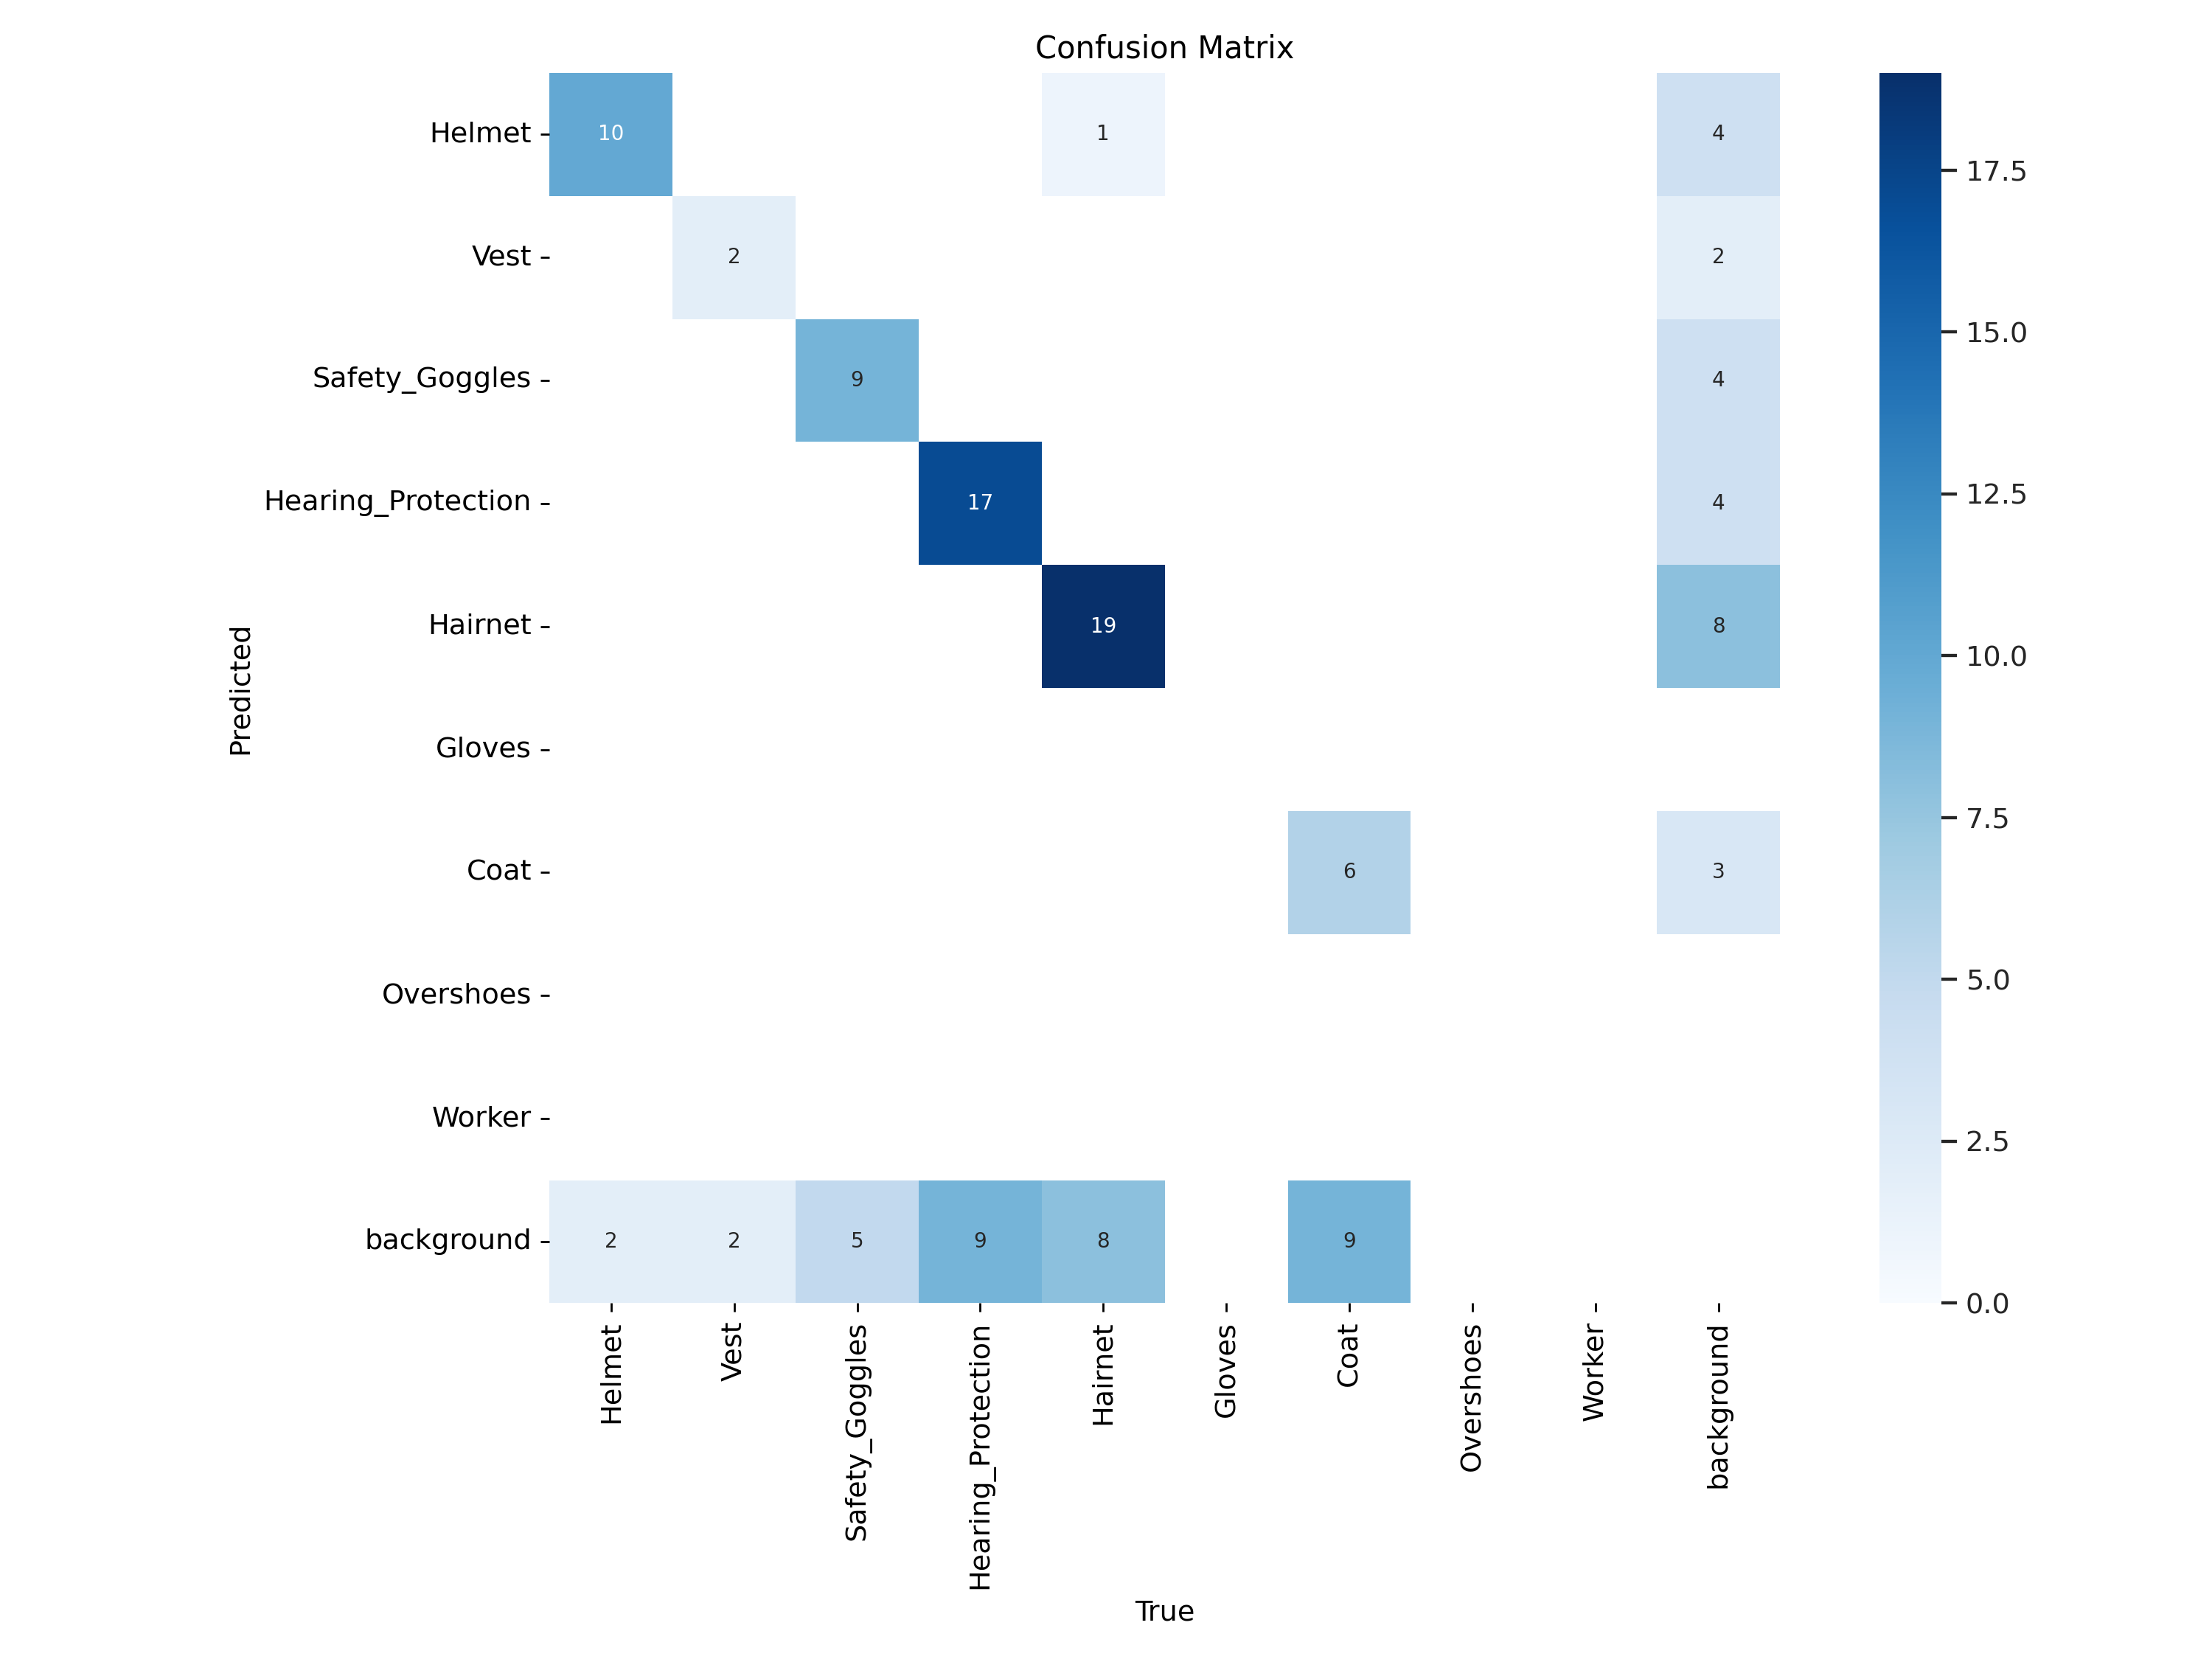

In [14]:
from IPython.display import display
from PIL import Image

# Load and display YOLO's evaluation graphs
display(Image.open('/content/runs/detect/val/confusion_matrix.png'))  # Confusion matrix



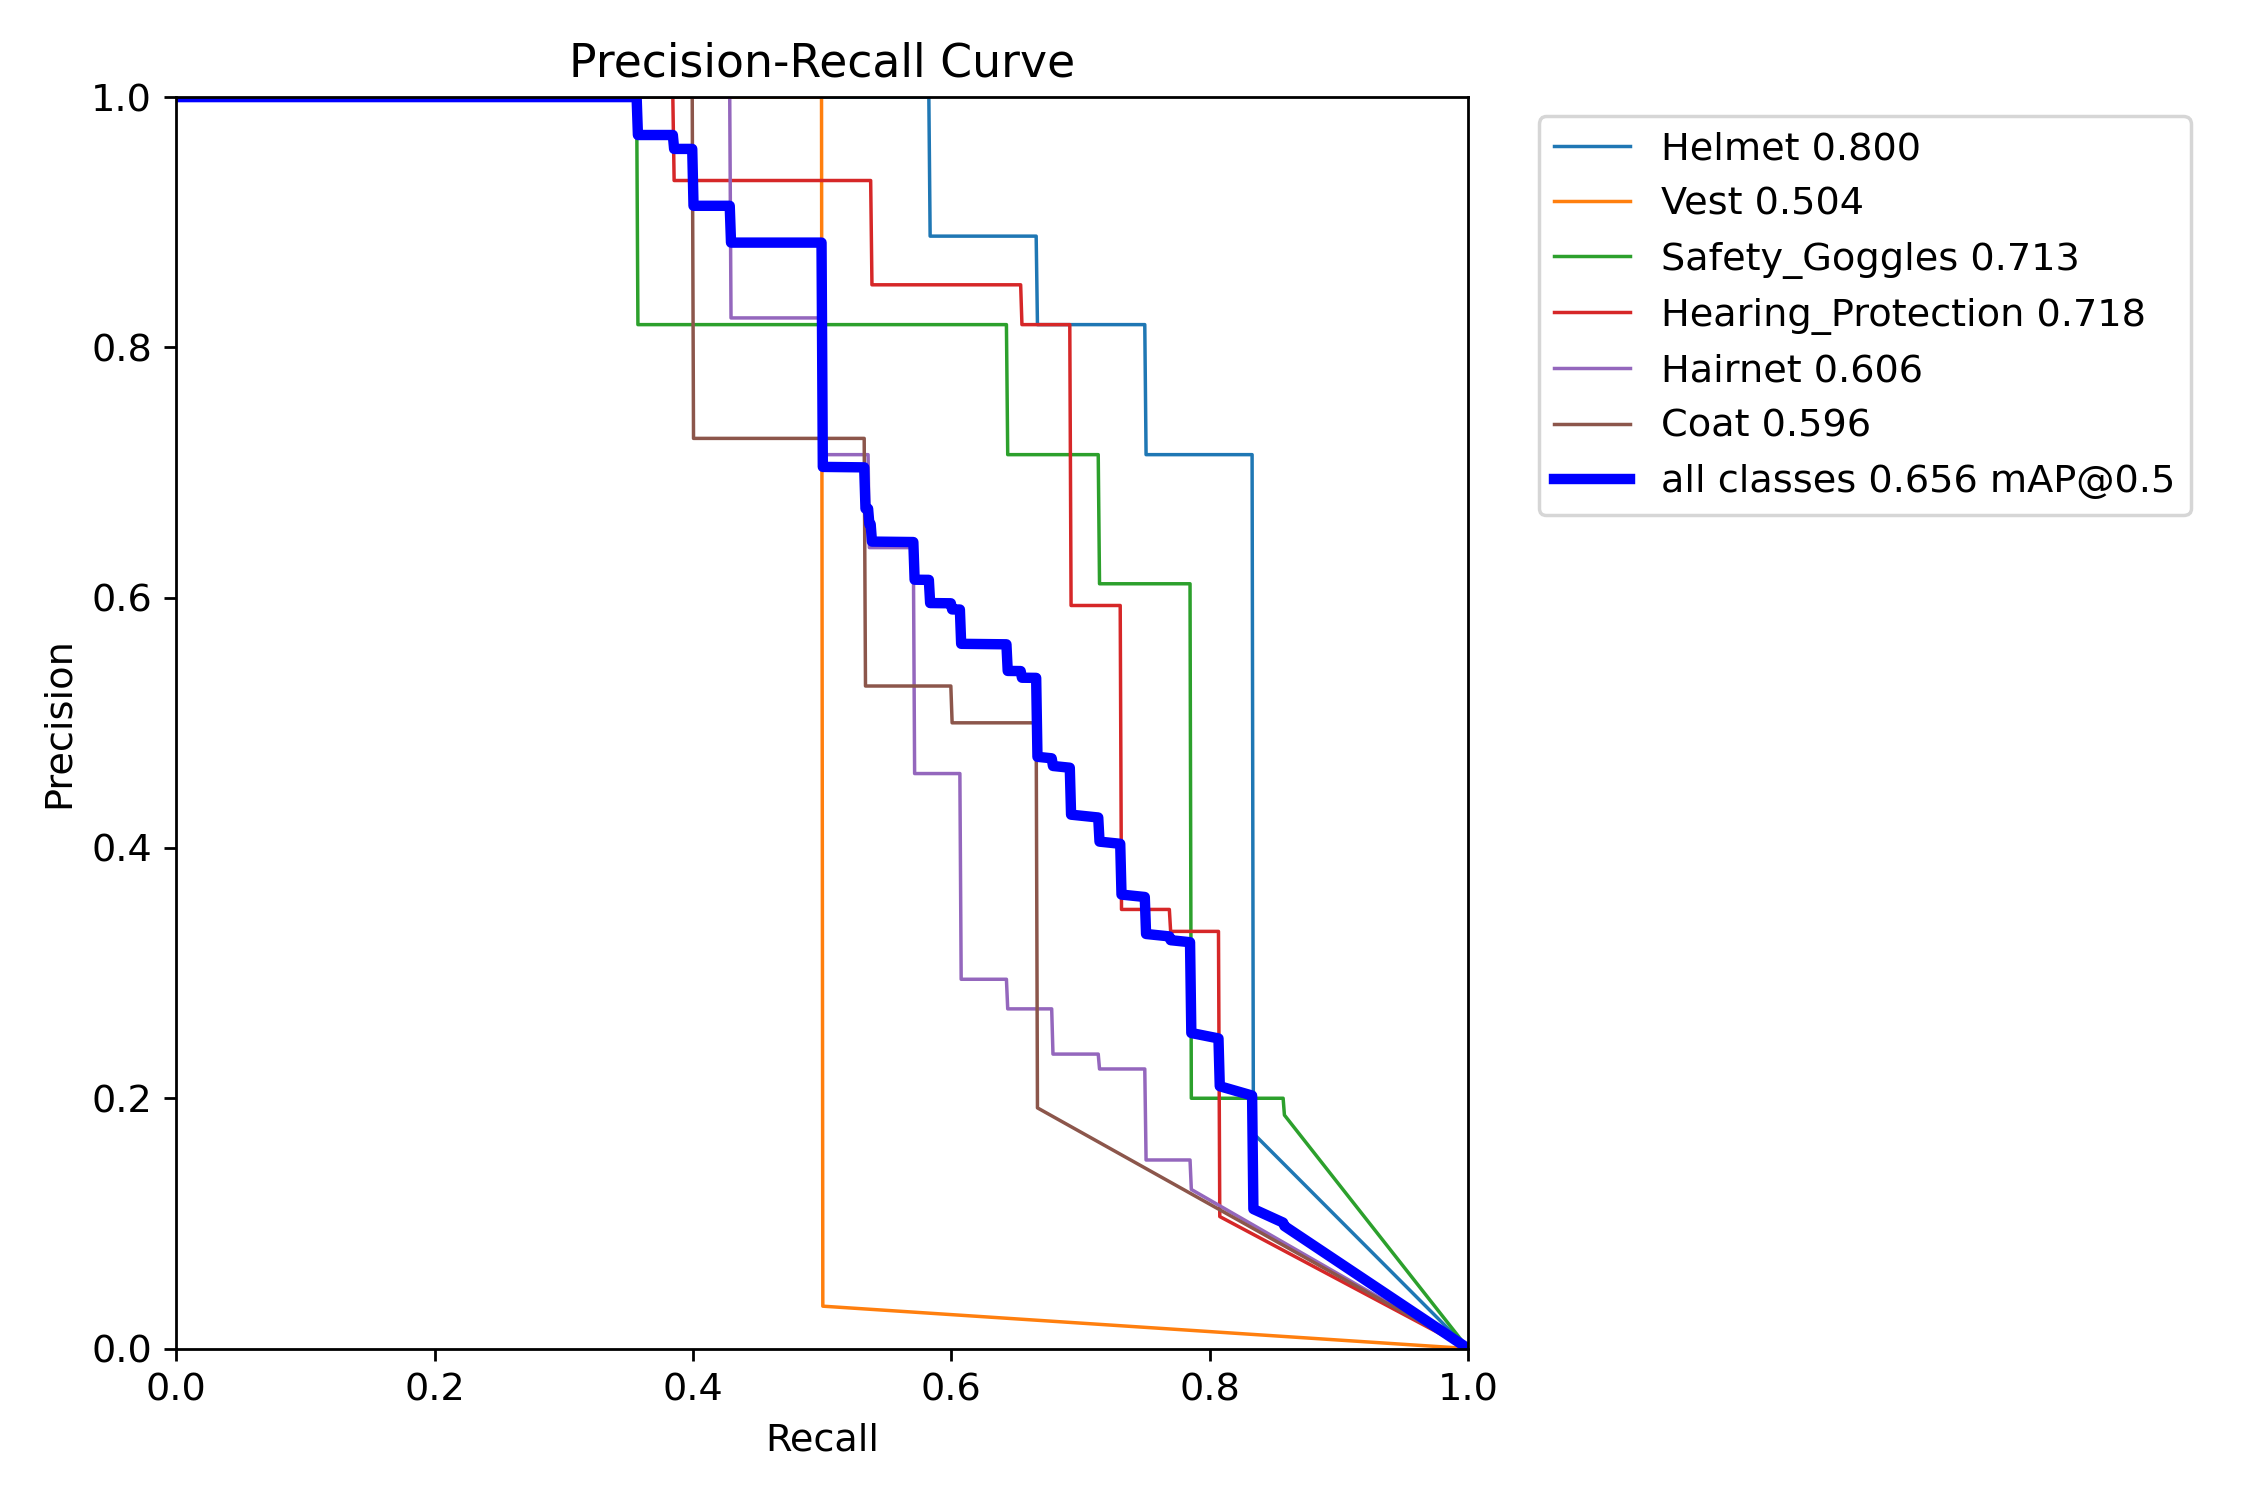

In [15]:
display(Image.open('/content/runs/detect/val/PR_curve.png'))  # Precision-Recall curve


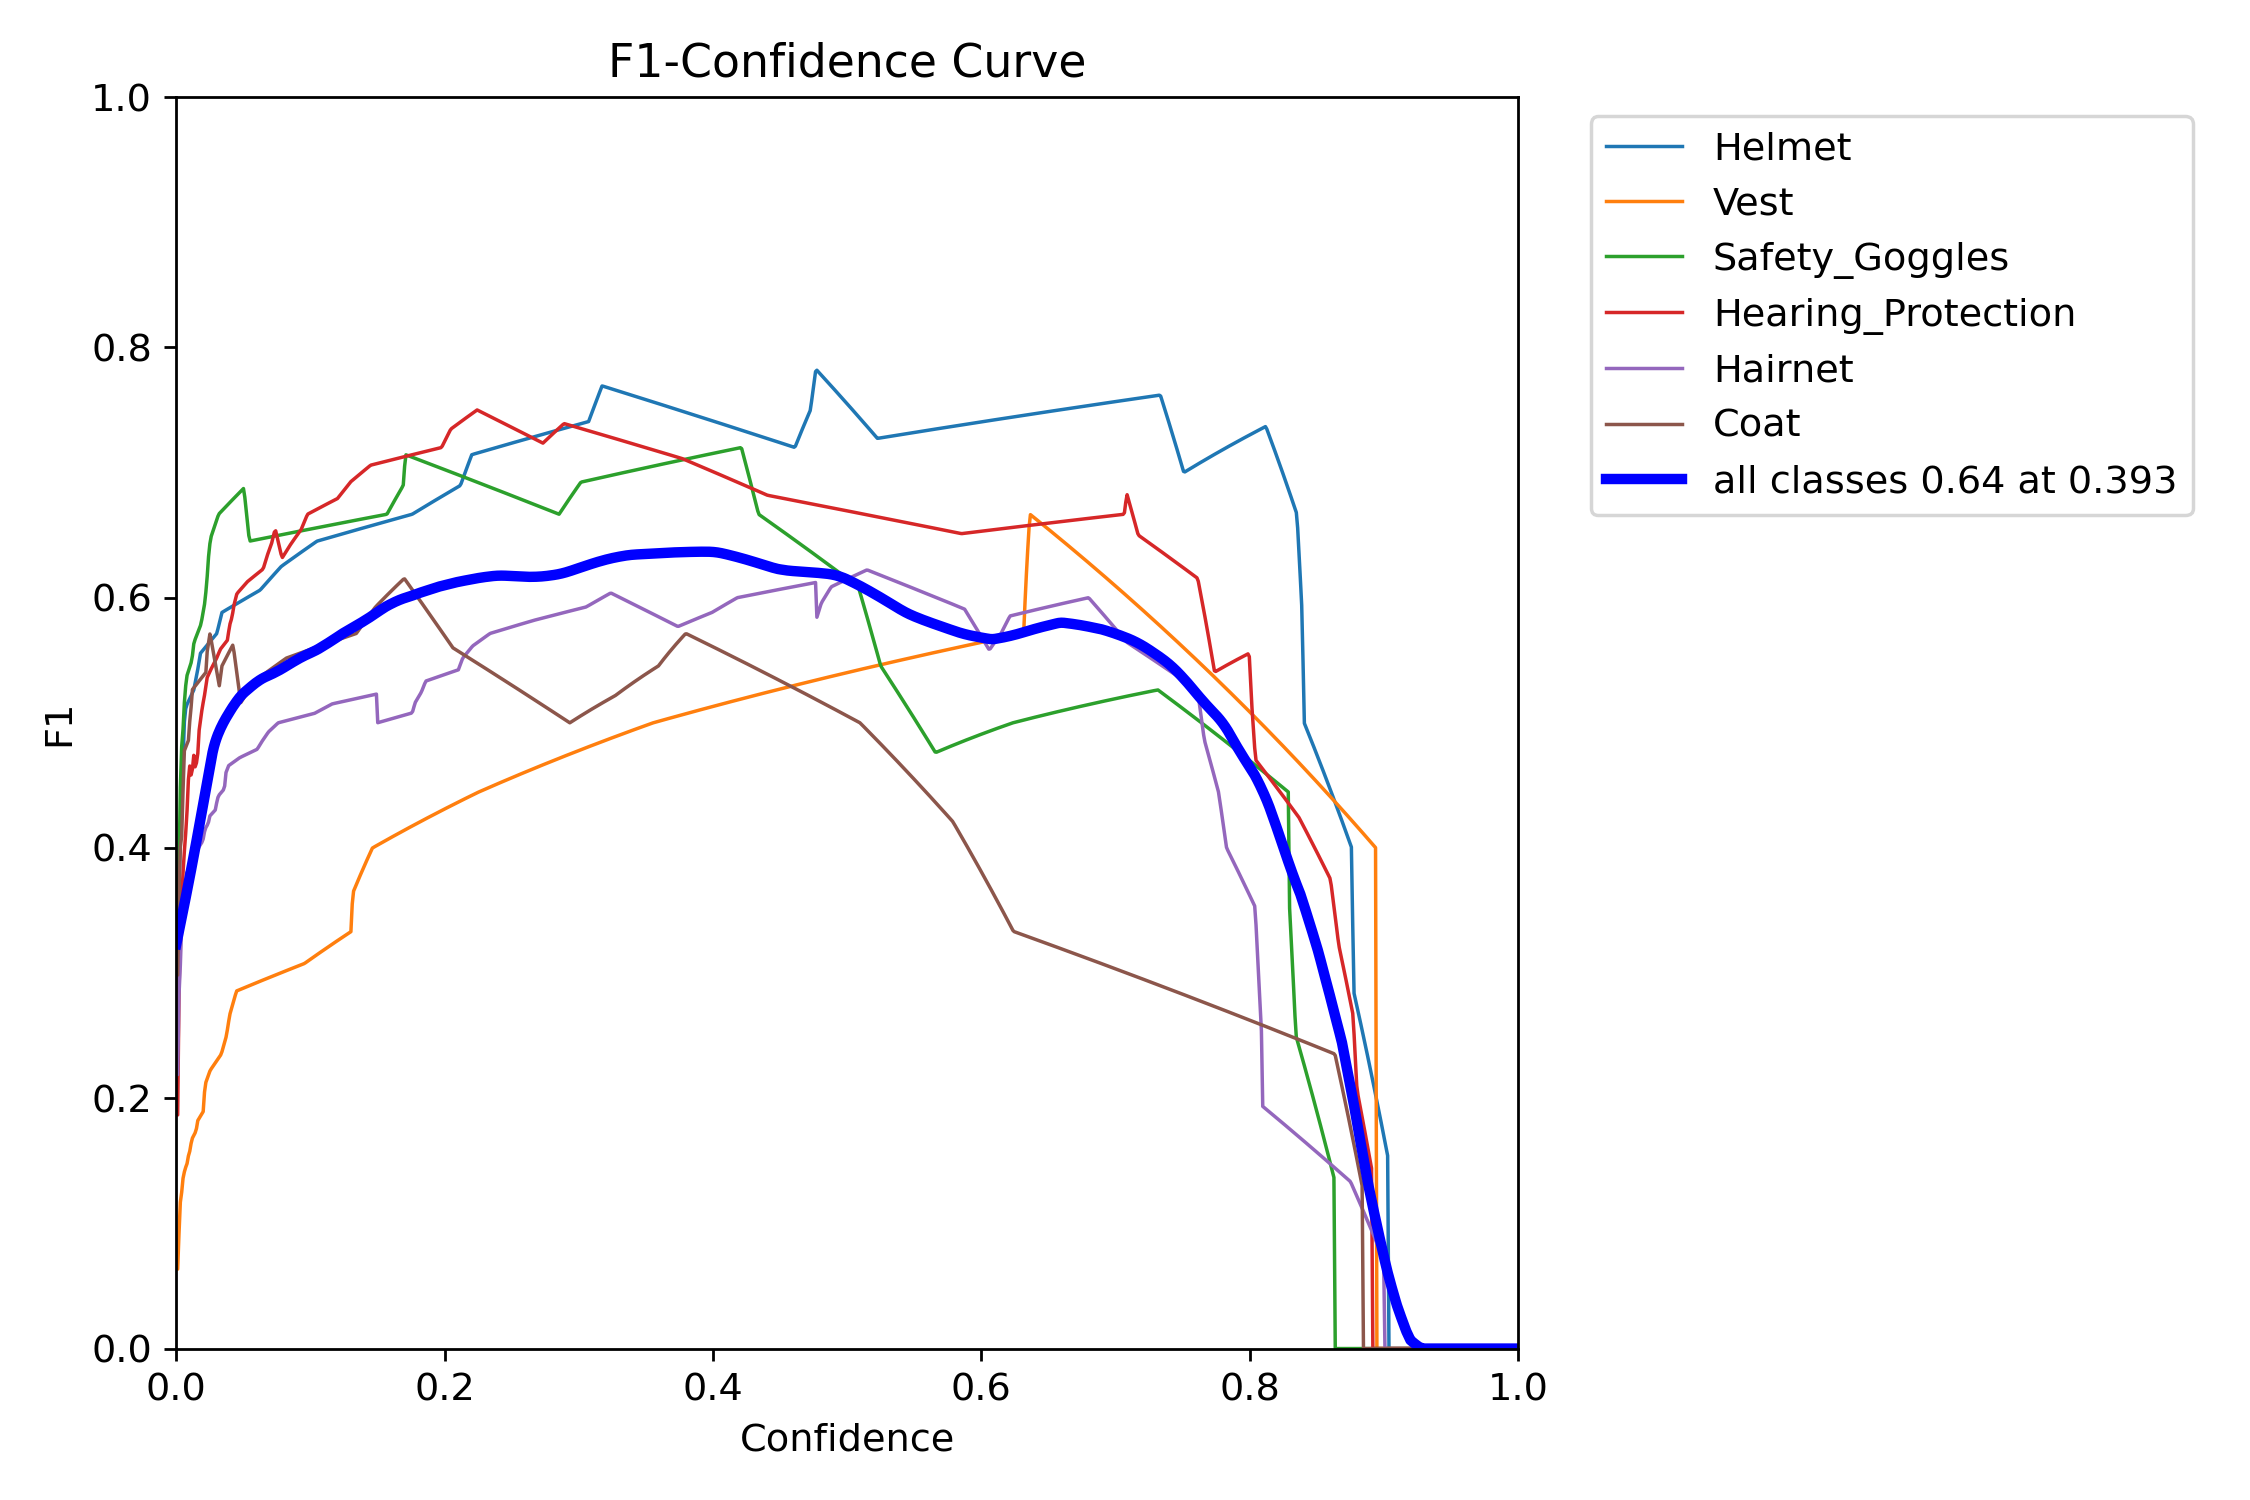

In [17]:
f1_curve_path = "/content/runs/detect/val/F1_curve.png"
precision_curve_path = "/content/runs/detect/val/P_curve.png"
recall_curve_path = "/content/runs/detect/val/R_curve.png"
display(Image.open(f1_curve_path))  # F1 score curve



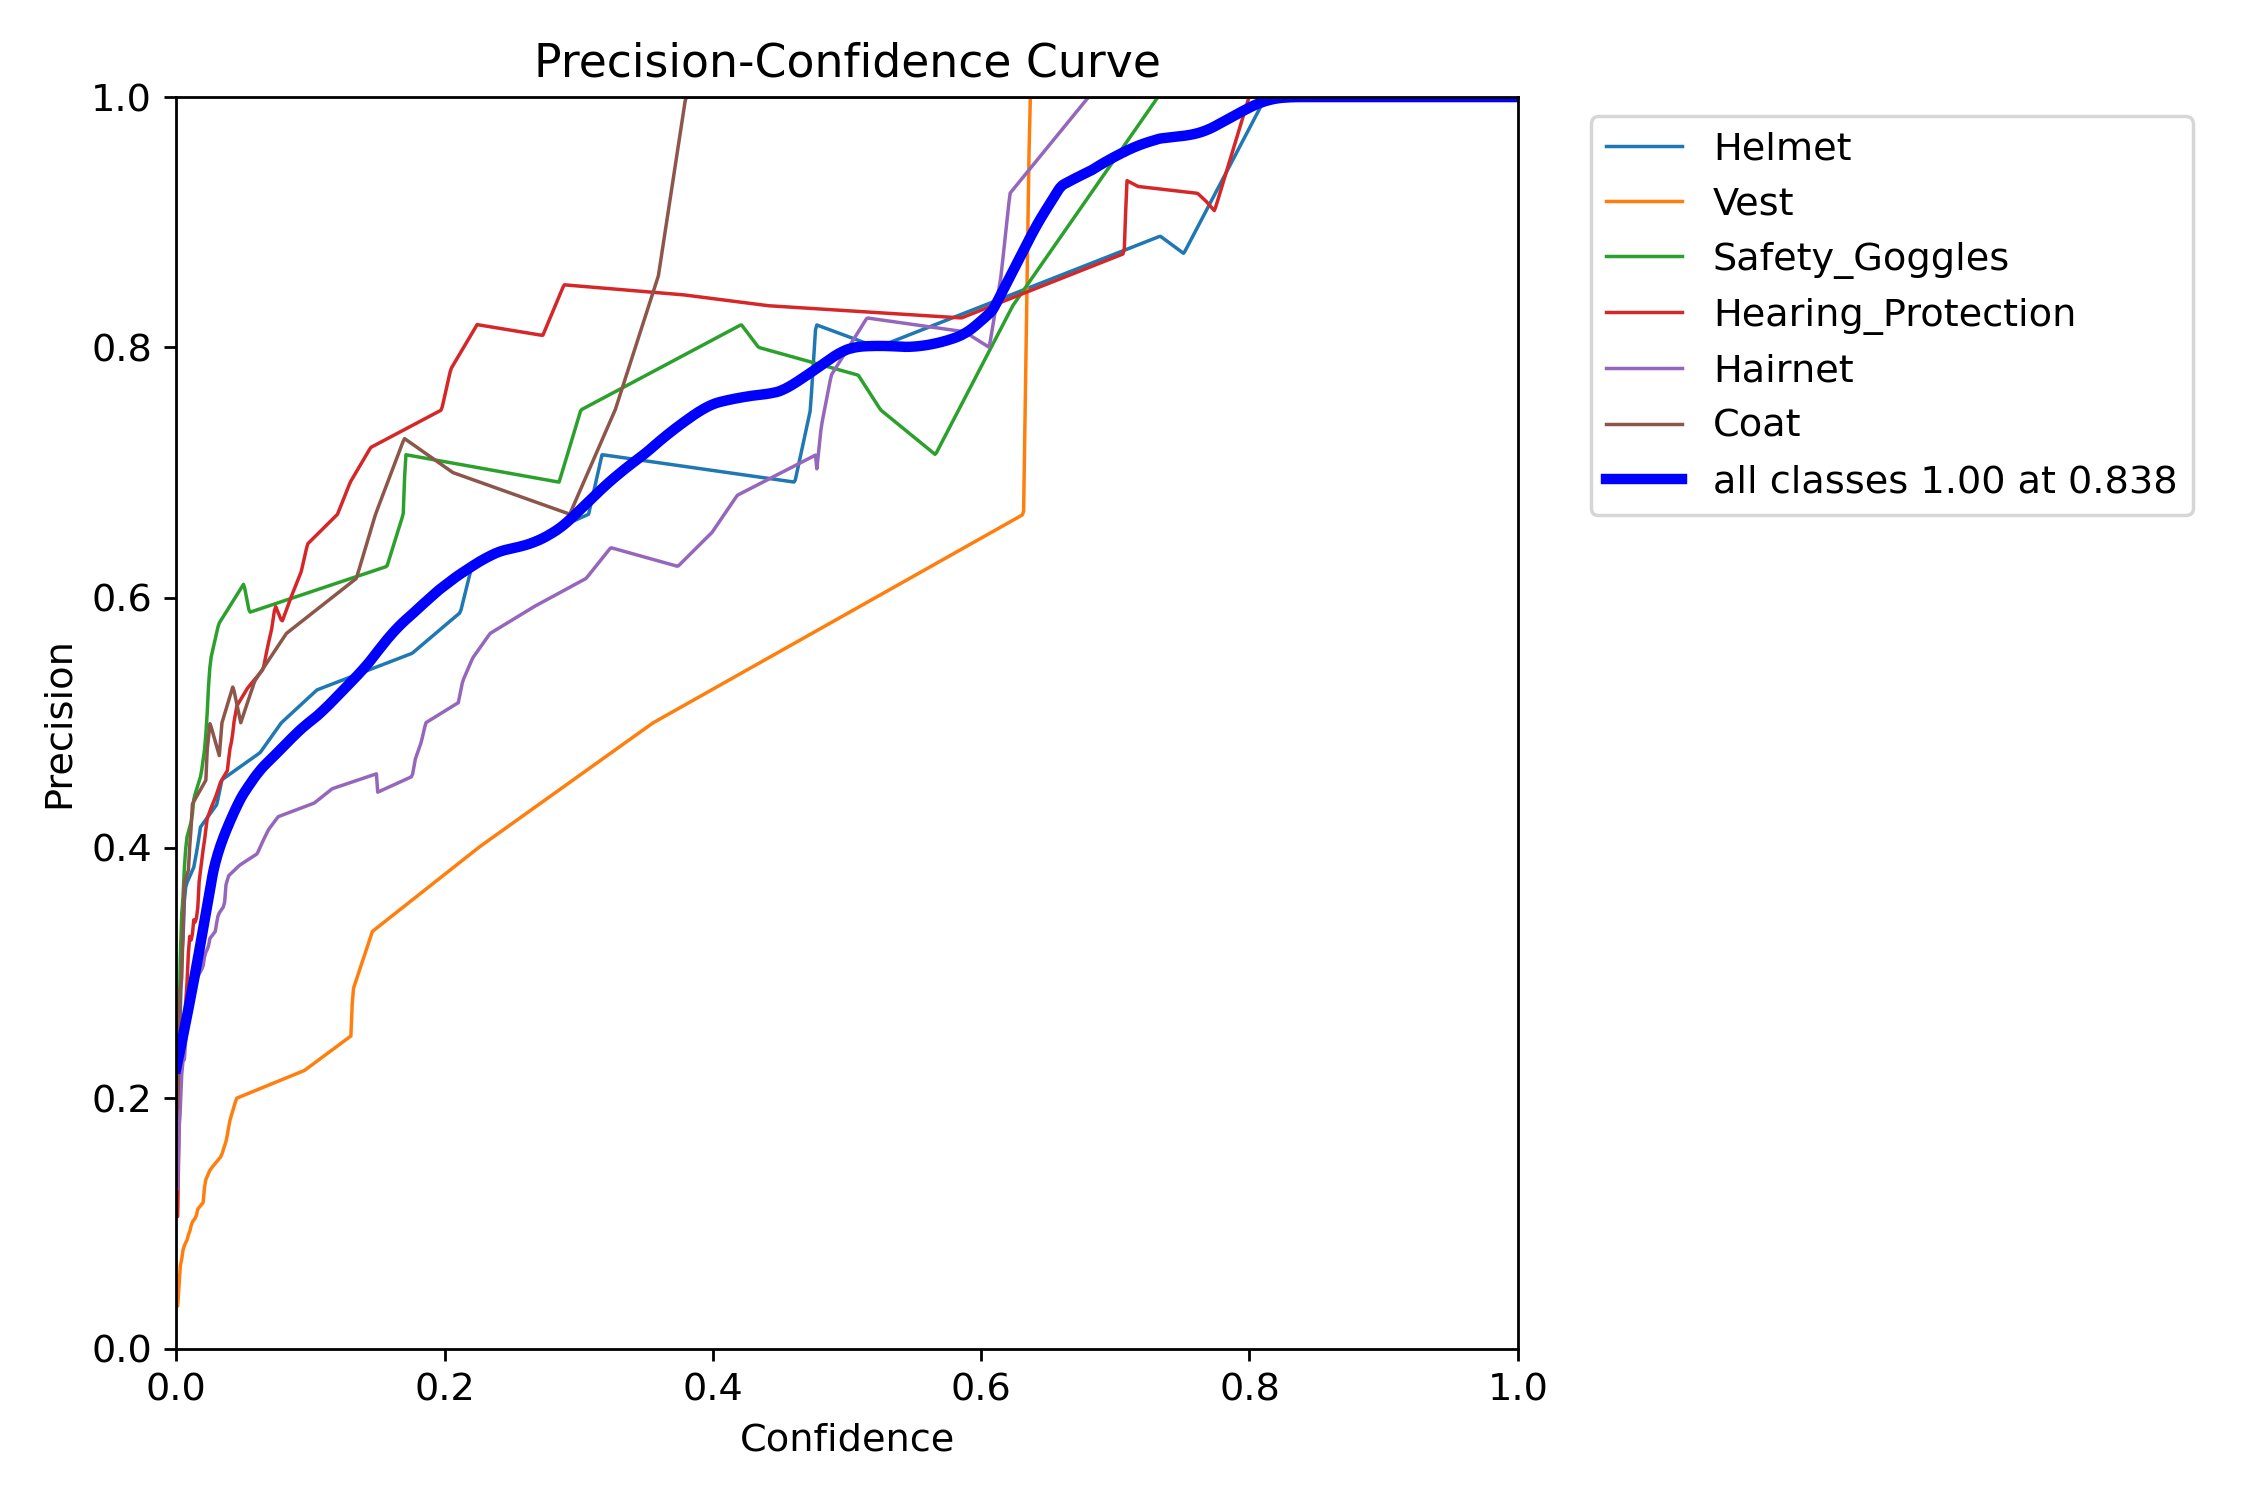

In [18]:
display(Image.open(precision_curve_path))  # Precision curve


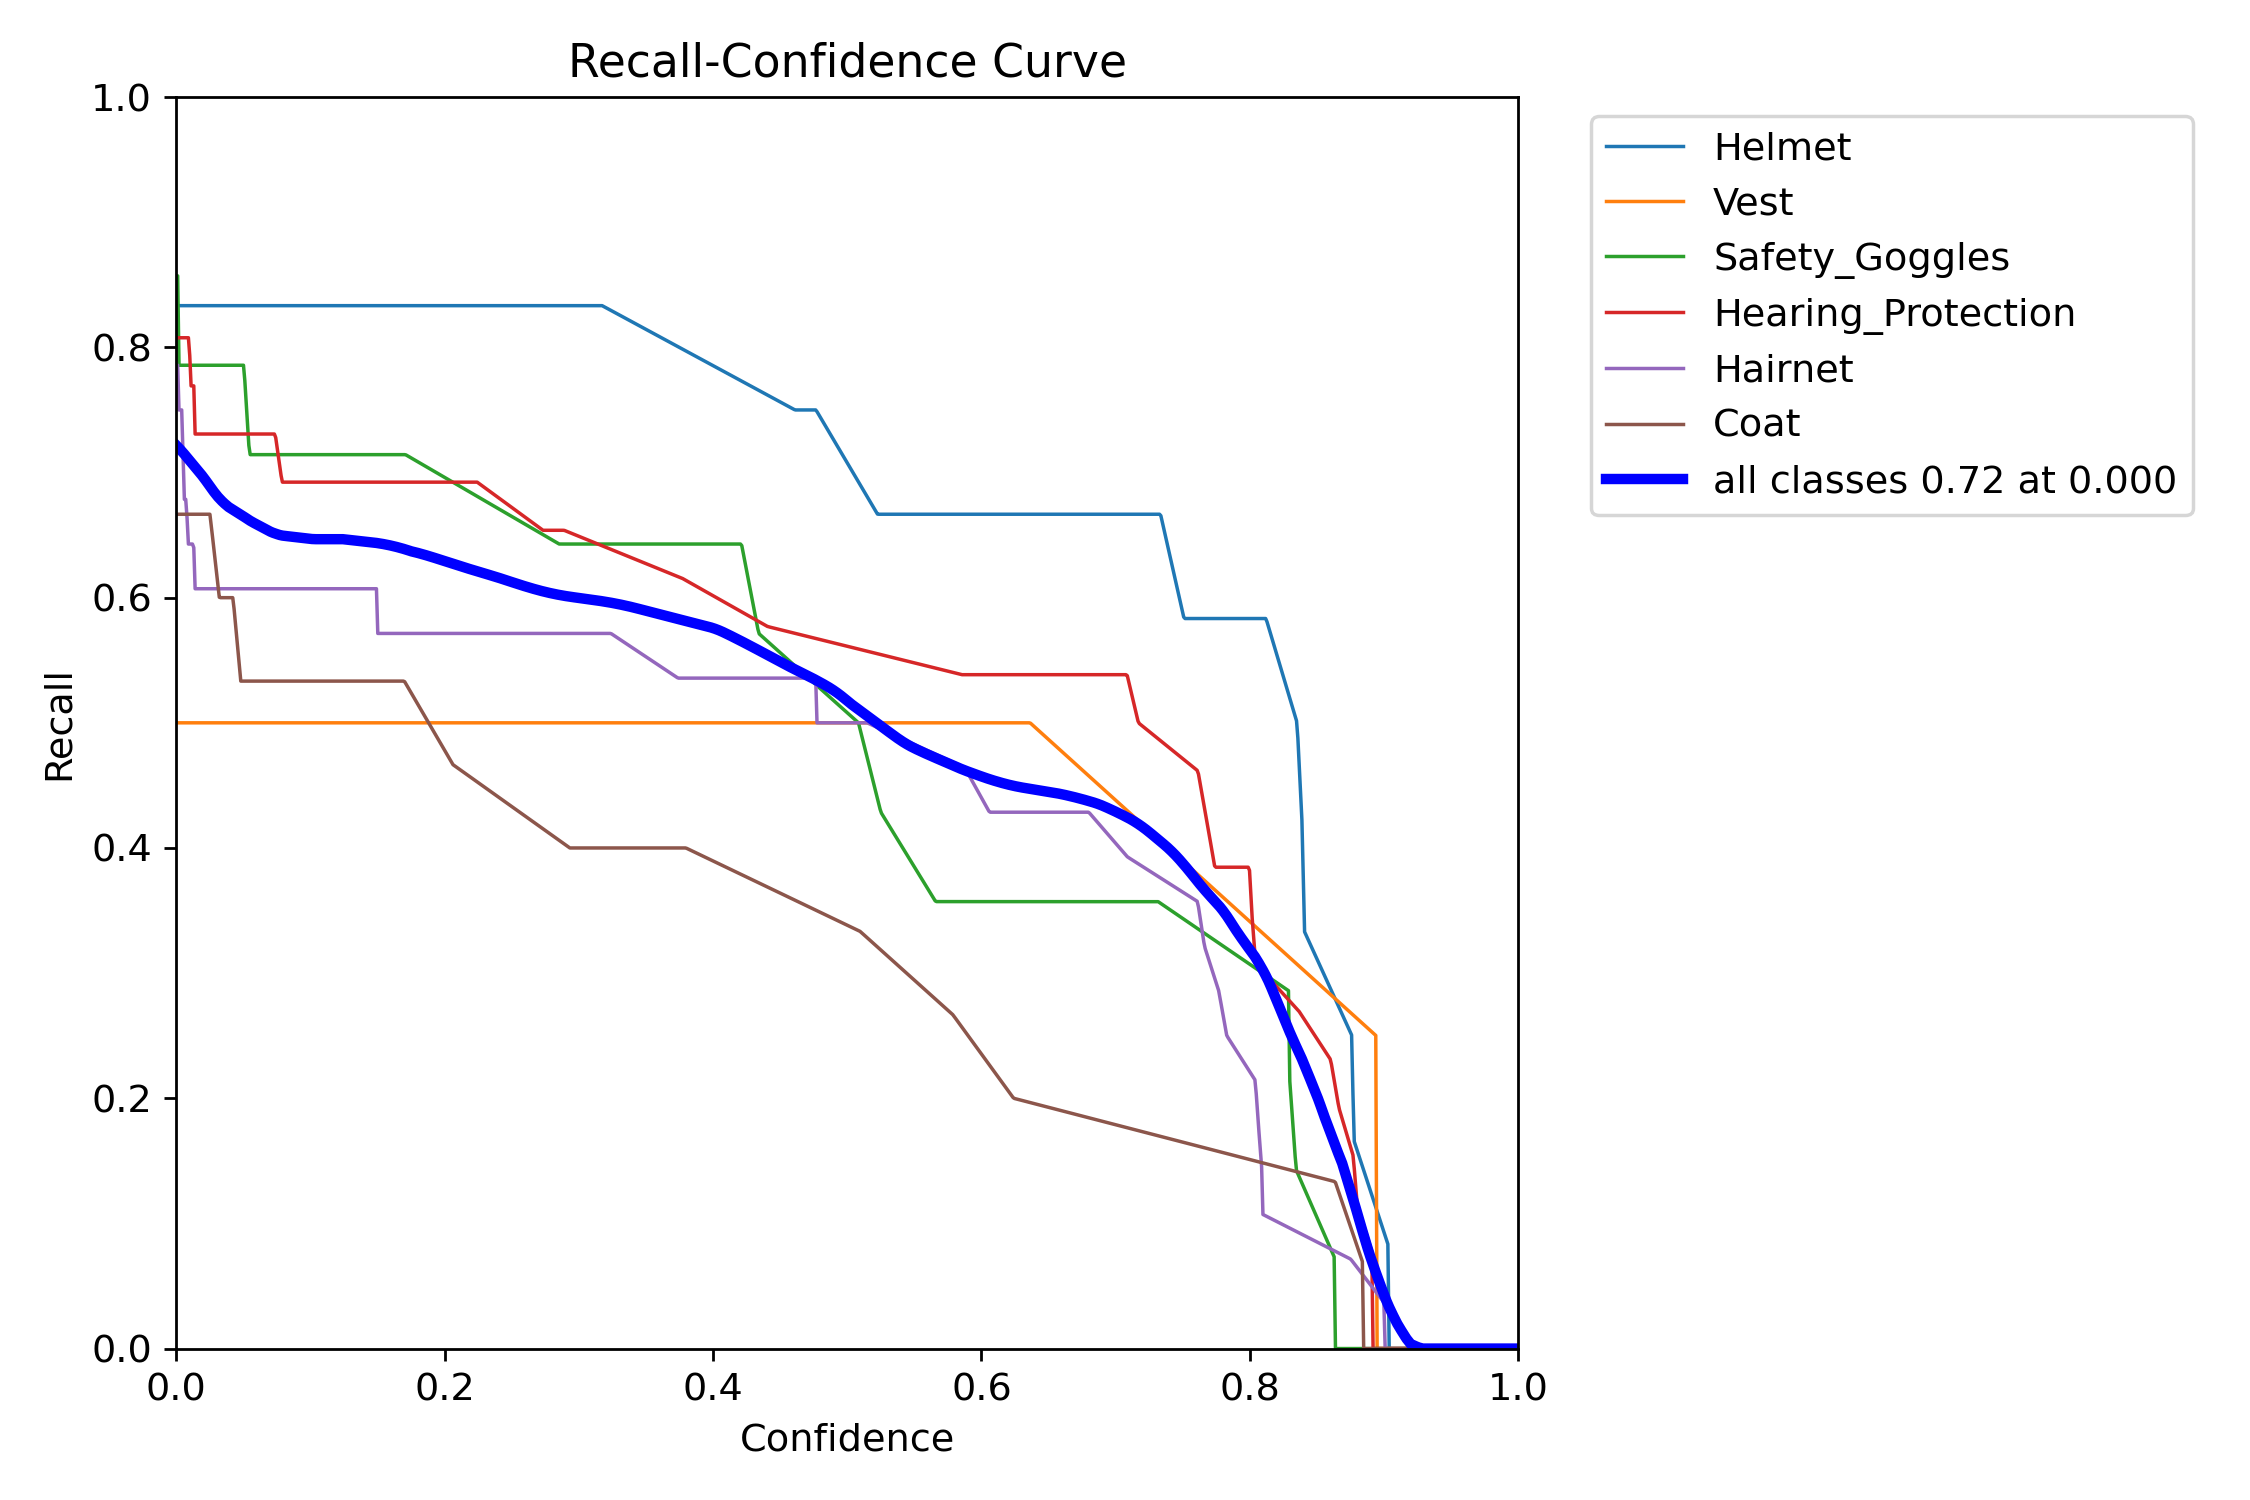

In [19]:
display(Image.open(recall_curve_path))  # Recall curve